# **IMPORTING ALL LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


# **IMPORTING THE DATASETS**

In [5]:
data_train = pd.read_excel('train_emt.xlsx')
data_test = pd.read_excel('test_emt.xlsx')

# **EXPLORATORY DATA ANALYSIS**

In [6]:
data_train.head(5)

,desc,emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [7]:
data_train['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   desc     15999 non-null  object
 1   emotion  15999 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [9]:
data_train

,desc,emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


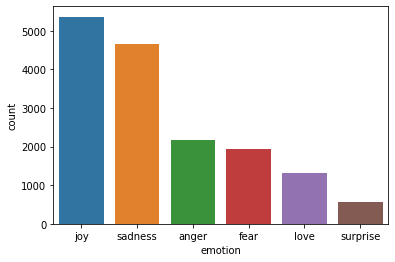

In [10]:
sns.countplot(data_train['emotion'],order = data_train['emotion'].value_counts(normalize=True).index)

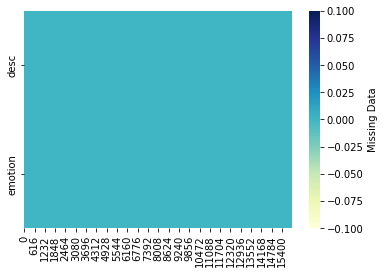

In [11]:
sns.heatmap(data_train.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [12]:
data_train['desc_len'] = data_train['desc'].astype(str).apply(len)
data_train['desc_WC'] = data_train['desc'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


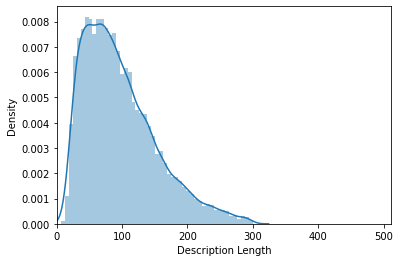

In [13]:
sns.distplot(data_train['desc_len'])
plt.xlim([0, 512]);
plt.xlabel('Description Length');

In [14]:
data_train

,desc,emotion,desc_len,desc_WC
0,i can go from feeling so hopeless to so damned...,sadness,108,21
1,im grabbing a minute to post i feel greedy wrong,anger,48,10
2,i am ever feeling nostalgic about the fireplac...,love,92,18
3,i am feeling grouchy,anger,20,4
4,ive been feeling a little burdened lately wasn...,sadness,65,12
...,...,...,...,...
15994,i just had a very brief time in the beanbag an...,sadness,101,24
15995,i am now turning and i feel pathetic that i am...,sadness,102,20
15996,i feel strong and good overall,joy,30,6
15997,i feel like this was such a rude comment and i...,anger,59,14


In [15]:
data_test.head(5)

,desc,emotion
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear


In [16]:
data_test['emotion'].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   desc     1999 non-null   object
 1   emotion  1999 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [18]:
data_test

,desc,emotion
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear
...,...,...
1994,i just keep feeling like someone is being unki...,anger
1995,im feeling a little cranky negative after this...,anger
1996,i feel that i am useful to my people and that ...,joy
1997,im feeling more comfortable with derby i feel ...,joy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


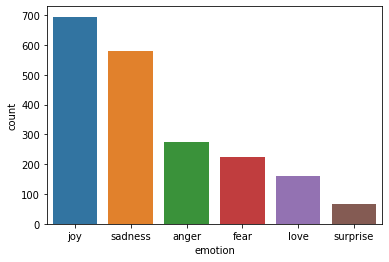

In [19]:
sns.countplot(data_test['emotion'],order = data_test['emotion'].value_counts(normalize=True).index)

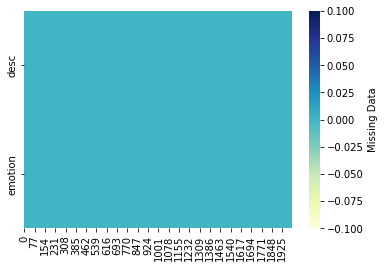

In [20]:
sns.heatmap(data_test.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [21]:
data_train=data_train[['desc','emotion']]
data_train.shape
data_test.shape

(1999, 2)

# **DATA PRE PROCESSING**

In [22]:
'''
import string
string.punctuation
import re

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text


data_train['desc'] = data_train['desc'].apply(lambda x:remove_punctuation(x))
data_train['desc'] = data_train['desc'].apply(lambda x: tokenization(x))
data_train['desc'] = data_train['desc'].apply(lambda x:remove_stopwords(x))
data_train['desc'] = data_train['desc'].apply(lambda x:lemmatizer(x))
'''

'\nimport string\nstring.punctuation\nimport re\n\ndef remove_punctuation(text):\n    punctuationfree="".join([i for i in text if i not in string.punctuation])\n    return punctuationfree\n\n\ndef tokenization(text):\n    tokens = re.split(\'W+\',text)\n    return tokens\n\nimport nltk\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\n#Stop words present in the library\nstopwords = nltk.corpus.stopwords.words(\'english\')\n\ndef remove_stopwords(text):\n    output= [i for i in text if i not in stopwords]\n    return output\n\nfrom nltk.stem import WordNetLemmatizer\n#defining the object for Lemmatization\nwordnet_lemmatizer = WordNetLemmatizer()\n\n\ndef lemmatizer(text):\n  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]\n  return lemm_text\n\n\ndata_train[\'desc\'] = data_train[\'desc\'].apply(lambda x:remove_punctuation(x))\ndata_train[\'desc\'] = data_train[\'desc\'].apply(lambda x: tokenization(x))\ndata_train[\'desc\'] = data_train[\'desc\'].apply(lambd

# **DATA VECTORIZATION AND CLEANUP**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vect = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

X=data_train['desc']
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(data_train['emotion'])
data_train['emotion_label'] = labelEncoder.transform(data_train['emotion'])
Y = data_train['emotion_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123)

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# **DATA MODELLING**

In [25]:
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train_dtm, y_train)
Y_pred = MNBmodel.predict(X_test_dtm)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, Y_pred))
print("Precision for MultinomialNB default:",metrics.precision_score(y_test, Y_pred,average='weighted'))

print('---------------------------------------------------------------------------------')

tree_reg_dt = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_reg_dt.fit(X_train_dtm, y_train)
y_pred = tree_reg_dt.predict(X_test_dtm)
#print("MSE - tree_reg_h:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R Squared - tree_reg_h:", metrics.r2_score(y_test, y_pred))
print('DT accuracy:',metrics.accuracy_score(y_test,y_pred))

print('---------------------------------------------------------------------------------')

knn_model_def = KNeighborsClassifier(n_neighbors=3)
knn_model_def.fit(X_train_dtm, y_train)
y_pred = knn_model_def.predict(X_test_dtm)
print("Accuracy for KNN default:",metrics.accuracy_score(y_test, y_pred))
print("Precision for KNN default:",metrics.precision_score(y_test, y_pred,average='weighted'))

print('---------------------------------------------------------------------------------')

model_svm_def = svm.SVC(kernel='linear')
model_svm_def.fit(X_train_dtm, y_train)
y_pred_svm = model_svm_def.predict(X_test_dtm)
print("Accuracy for SVM default:", accuracy_score(y_test, y_pred_svm))
print("Precision for SVM default:",metrics.precision_score(y_test, y_pred_svm,average='weighted'))

print('---------------------------------------------------------------------------------')

model_rf_def = RandomForestClassifier(n_estimators=100)
model_rf_def.fit(X_train_dtm, y_train)
y_pred_def_rf = model_rf_def.predict(X_test_dtm)
print("Accuracy for RF default:", accuracy_score(y_test, y_pred_def_rf))
print("Precision for RF default:",metrics.precision_score(y_test, y_pred_def_rf,average='weighted'))

MultinomialNB Accuracy: 0.7716666666666666
Precision for MultinomialNB default: 0.7971892747231408
---------------------------------------------------------------------------------
R Squared - tree_reg_h: 0.6505271990808816
DT accuracy: 0.8722916666666667
---------------------------------------------------------------------------------
Accuracy for KNN default: 0.44729166666666664
Precision for KNN default: 0.5109086042624956
---------------------------------------------------------------------------------
Accuracy for SVM default: 0.8695833333333334
Precision for SVM default: 0.8697843143571433
---------------------------------------------------------------------------------
Accuracy for RF default: 0.8795833333333334
Precision for RF default: 0.8792007453482099


# **DEALING WITH IMBALANCED DATA**

In [26]:
Counter(data_train['emotion'])

Counter({'anger': 2159,
         'fear': 1937,
         'joy': 5362,
         'love': 1304,
         'sadness': 4665,
         'surprise': 572})

In [27]:
dt_sup = data_train.loc[data_train['emotion'] == 'surprise']
dt_love = data_train.loc[data_train['emotion'] == 'love']
dt_fear = data_train.loc[data_train['emotion'] == 'fear']
dt_anger = data_train.loc[data_train['emotion'] == 'anger']
dt_sad = data_train.loc[data_train['emotion'] == 'sadness']
dt_joy = data_train.loc[data_train['emotion'] == 'joy']

In [28]:
data_balanced = pd.concat([dt_sup,dt_love.head(572),dt_fear.head(572),dt_anger.head(572),dt_sad.head(572),dt_joy.head(572)],axis=0)
Counter(data_balanced['emotion'])

Counter({'anger': 572,
         'fear': 572,
         'joy': 572,
         'love': 572,
         'sadness': 572,
         'surprise': 572})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


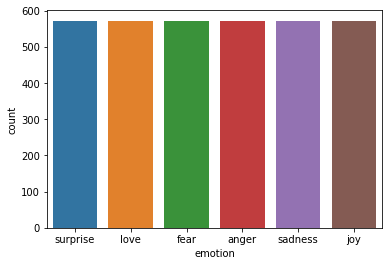

In [31]:
sns.countplot(data_balanced['emotion'],order = data_balanced['emotion'].value_counts(normalize=True).index)

# **HYPER PARAMETERS TUNING**

In [29]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vect = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

X=data_balanced['desc']
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(data_balanced['emotion'])
data_balanced['emotion_label'] = labelEncoder.transform(data_balanced['emotion'])
Y = data_balanced['emotion_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123)

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [35]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5,return_train_score=True, scoring="accuracy")
grid_search.fit(X_train_dtm, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
nbgs = MultinomialNB(**grid_search.best_params_)
nbgs.fit(X_train_dtm, y_train)
y_pred_nbgs = nbgs.predict(X_test_dtm)
print('accuracy',accuracy_score(y_test, y_pred_nbgs))
test_score = nbgs.score(X_test_dtm,y_test)
print("Test set score with best parameters: {:.2f}".format(test_score))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
Best parameters: {'alpha': 1.0}
Best cross-validation score: 0.69
accuracy 0.7194174757281553
Test set score with best parameters: 0.72


In [36]:
param_grid = {'C': [0.001,0.1, 0.5, 1,10]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid_search.fit(X_train_dtm, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

mode_svm_gs = svm.SVC(**grid_search.best_params_)
mode_svm_gs.fit(X_train_dtm, y_train)

y_pred_f = mode_svm_gs.predict(X_test_dtm)
print("Accuracy for SVM GS:",metrics.accuracy_score(y_test, y_pred_f))
print("Precision for SVM GS:",metrics.precision_score(y_test, y_pred_f,average='weighted'))

Parameter grid:
{'C': [0.001, 0.1, 0.5, 1, 10]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........................C=0.001;, score=0.175 total time=   0.7s
[CV 2/5] END ...........................C=0.001;, score=0.175 total time=   0.7s
[CV 3/5] END ...........................C=0.001;, score=0.173 total time=   0.7s
[CV 4/5] END ...........................C=0.001;, score=0.175 total time=   0.7s
[CV 5/5] END ...........................C=0.001;, score=0.175 total time=   0.7s
[CV 1/5] END .............................C=0.1;, score=0.175 total time=   0.8s
[CV 2/5] END .............................C=0.1;, score=0.175 total time=   0.7s
[CV 3/5] END .............................C=0.1;, score=0.173 total time=   0.7s
[CV 4/5] END .............................C=0.1;, score=0.175 total time=   0.7s
[CV 5/5] END .............................C=0.1;, score=0.175 total time=   0.7s
[CV 1/5] END .............................C=0.5;, score=0.466 total time=   0.7s
[

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}
grid_search = GridSearchCV(RandomForestClassifier(), random_grid, refit = True, verbose = 3)
grid_search.fit(X_train_dtm, y_train)
                
model_rf_gs = RandomForestClassifier(**grid_search.best_params_)
model_rf_gs.fit(X_train_dtm, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

y_pred_f = model_rf_gs.predict(X_test_dtm)
print('Accuracy for RF GS:',accuracy_score(y_test, y_pred_f))
print("Precision for RF GS:",metrics.precision_score(y_test, y_pred_f,average='weighted'))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.694 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.721 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.752 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.760 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.748 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.767 total time=   1.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.775 total time=   1.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.746 total time=   1.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.750 total time=   1.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, n_estimators=400;,

In [35]:
knn = KNeighborsClassifier()
k_range = list(range(1, 61))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_dtm, y_train)

print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

model_knn_gs = KNeighborsClassifier(**grid_search.best_params_)
model_knn_gs.fit(X_train_dtm, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

y_pred_f = model_knn_gs.predict(X_test_dtm)
print('Accuracy for KNN GS:',accuracy_score(y_test, y_pred_f))
print("Precision for KNN GS:",metrics.precision_score(y_test, y_pred_f,average='weighted'))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : 37.38%
Best parameters: {'n_neighbors': 3}
Accuracy for KNN GS: 0.4077669902912621
Precision for KNN GS: 0.4556902654306329


In [38]:
dec_tree = DecisionTreeClassifier()
max_depth_range=[5,7,9,11,13,15]
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range}]

clf_GS = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=3)
clf_GS.fit(X_train_dtm, y_train)

print('Best parameters:',clf_GS.best_params_)

model_dt_gs = DecisionTreeClassifier(**clf_GS.best_params_)
model_dt_gs.fit(X_train_dtm, y_train)

y_pred_f = model_dt_gs.predict(X_test_dtm)
print("Accuracy for SVM GS:",metrics.accuracy_score(y_test, y_pred_f))
print("Precision for SVM GS:",metrics.precision_score(y_test, y_pred_f,average='weighted'))

Best parameters: {'criterion': 'entropy', 'max_depth': 15}
Accuracy for SVM GS: 0.30970873786407765
Precision for SVM GS: 0.37313924007491966


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **CONCLUSION**

in conclusion to the above analysis and data modelling we finally arrive to the fact that after cleaning up the data and trying various models the best model that solves our business issue is the Random Forest model.